In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import wordcloud

# Loading the datasets
music_schedule_path = "C:/Users/mlawal/Downloads/Dissertation Papers/Speaker/music_schedule_2019.csv"
speaker_schedule_path = "C:/Users/mlawal/Downloads/Dissertation Papers/Speaker/speaker_schedule_2019.csv"


In [5]:

music_schedule_df = pd.read_csv(music_schedule_path)
speaker_schedule_df = pd.read_csv(speaker_schedule_path)

# Summary Statistics
music_summary_stats = music_schedule_df.describe(include='all')
speaker_summary_stats = speaker_schedule_df.describe(include='all')

# Checking for missing values
music_missing_values = music_schedule_df.isnull().sum()
speaker_missing_values = speaker_schedule_df.isnull().sum()

# Data Cleaning for the music dataset
music_schedule_df['genre'].fillna('Unknown', inplace=True)
music_schedule_df['subgenre'].fillna('Unknown', inplace=True)
music_schedule_cleaned = music_schedule_df.dropna(subset=['audio'])

In [6]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Music Events by Date')

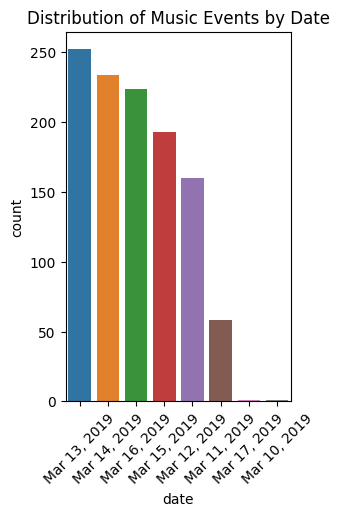

In [7]:
plt.subplot(1, 2, 1)
sns.countplot(x='date', data=music_schedule_cleaned, order=music_schedule_cleaned['date'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Music Events by Date')

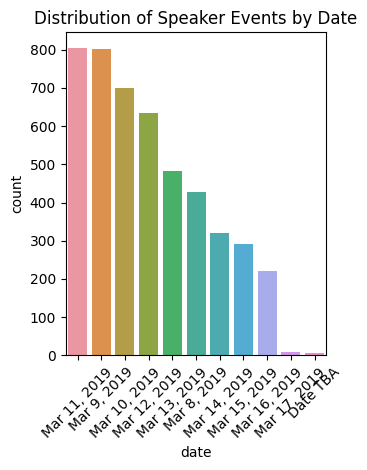

In [8]:
plt.subplot(1, 2, 2)
sns.countplot(x='date', data=speaker_schedule_df, order=speaker_schedule_df['date'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Speaker Events by Date')
plt.tight_layout()
plt.show()

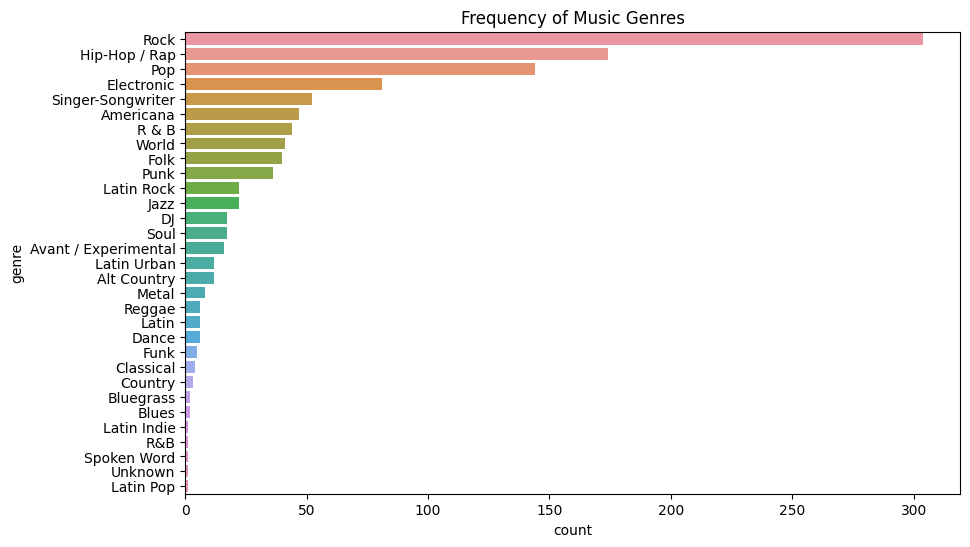

In [9]:
# Visualization: Frequency of different genres in the music dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=music_schedule_cleaned, order=music_schedule_cleaned['genre'].value_counts().index)
plt.title('Frequency of Music Genres')
plt.show()

In [12]:
def categorize_time(time_str):
    if isinstance(time_str, str):
        try:
            time = datetime.datetime.strptime(time_str.split(' — ')[0].split(' —')[0], '%I:%M%p')
            if 6 <= time.hour < 12:
                return 'Morning'
            elif 12 <= time.hour < 18:
                return 'Afternoon'
            else:
                return 'Evening'
        except ValueError:
            return 'Unknown'
    return 'Unknown'


In [13]:
# Applying the function to both datasets
music_schedule_cleaned['part_of_day'] = music_schedule_cleaned['event_time'].apply(categorize_time)
speaker_schedule_df['part_of_day'] = speaker_schedule_df['event_time'].apply(categorize_time)


C:\Users\mlawal\AppData\Local\Temp\ipykernel_6184\1813826645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_schedule_cleaned['part_of_day'] = music_schedule_cleaned['event_time'].apply(categorize_time)


In [14]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Time Distribution of Music Events')

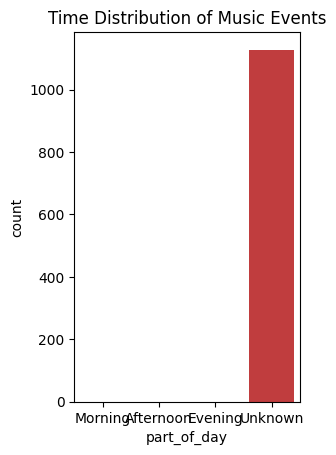

In [15]:
plt.subplot(1, 2, 1)
sns.countplot(x='part_of_day', data=music_schedule_cleaned, order=['Morning', 'Afternoon', 'Evening', 'Unknown'])
plt.title('Time Distribution of Music Events')

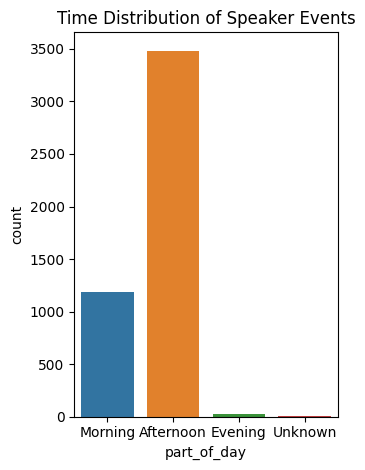

In [16]:
plt.subplot(1, 2, 2)
sns.countplot(x='part_of_day', data=speaker_schedule_df, order=['Morning', 'Afternoon', 'Evening', 'Unknown'])
plt.title('Time Distribution of Speaker Events')
plt.tight_layout()
plt.show()

In [17]:
# Creating a word cloud for summaries in the speaker dataset
all_summaries = ' '.join(speaker_schedule_df['summary'].dropna())
wordcloud_image = wordcloud.WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_summaries)


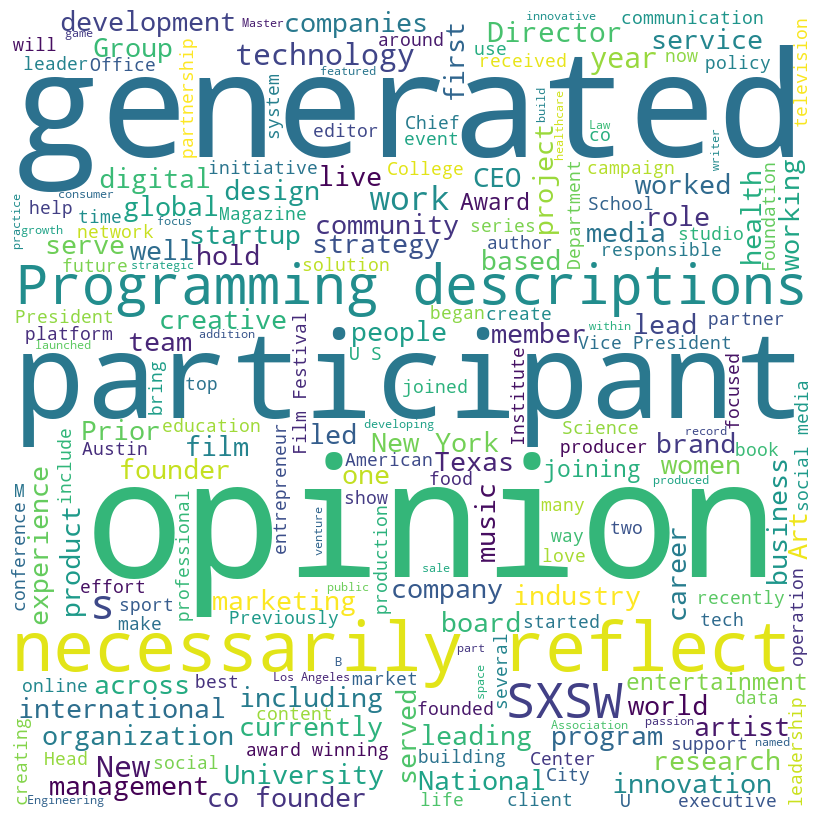

In [18]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud_image) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()